## Creating a simple graph

In [6]:
class Graph:
    def __init__(self,nVertices):
        self.nVertices = nVertices
        self.adjMatrix = [[0 for i in range(nVertices)] for j in range(nVertices)]
    
    def addEdge(self,v1,v2):
        self.adjMatrix[v1][v2] = 1
        self.adjMatrix[v2][v1] = 1
    
    def removeEdge(self,v1,v2):  ## Before removing, check whether there is an edge
        if self.containsEdge(v1,v2) is False:
            return 
        else:
            self.adjMatrix[v1][v2] = 0
            self.adjMatrix[v2][v1] = 0
    
    def containsEdge(self,v1,v2):   ## if there is an edge,then it will return True
        if self.adjMatrix[v1][v2]>0:
            return True
        else:
            return False
    
    def __str__(self):
        return str(self.adjMatrix)

In [7]:
obj1 = Graph(5)
obj1.addEdge(0,1)
obj1.addEdge(1,3)
obj1.addEdge(2,4)

In [8]:
print(obj1)

[[0, 1, 0, 0, 0], [1, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0]]


## Depth First Search

In [9]:
class DFS(Graph):    
    def __dfsHelper(self,sv,visited):  ## private class
        print(sv,end=' ')
        visited[sv] = True
        for i in range(self.nVertices):
            ## if there is an edge and that edge is not visited
            if (self.adjMatrix[sv][i]>0) and (visited[i] is False):
                self.__dfsHelper(i,visited)        
    
    def dfs(self):
        visited = [False for i in range(self.nVertices)]  ## maintaining a visited array (intially which is 0)
        self.__dfsHelper(0,visited)
    
    def __str__(self):
        return str(self.adjMatrix)

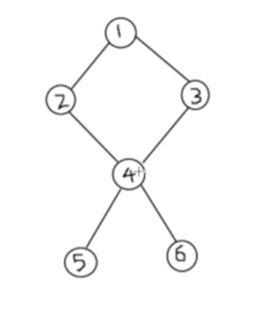

In [10]:
obj1 = DFS(5)
obj1.addEdge(0,1)
obj1.addEdge(1,3)
obj1.addEdge(2,4)
obj1.addEdge(2,3)
obj1.addEdge(0,2)

obj1.dfs()

0 1 3 2 4 

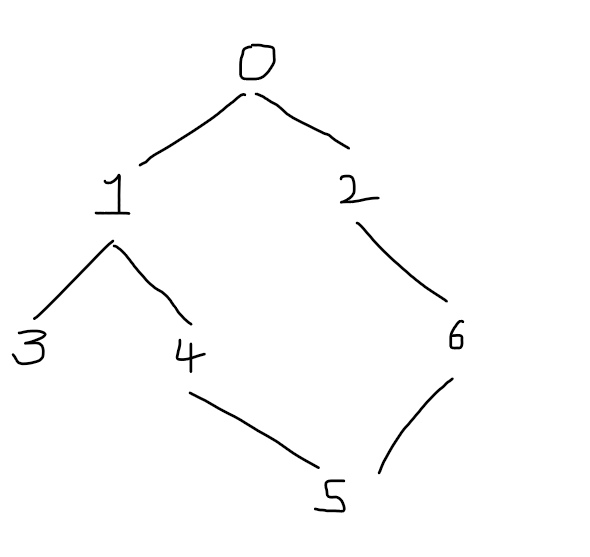

In [89]:
obj1 = Graph(7)
obj1.addEdge(0,1)
obj1.addEdge(0,2)

obj1.addEdge(1,3)
obj1.addEdge(1,4)
obj1.addEdge(4,5)

obj1.addEdge(2,6)
obj1.addEdge(6,5)

obj1.dfs()

0 1 3 4 5 6 2 

## Breadth First Search

In [90]:
import queue

In [91]:
class Graph:
    def __init__(self,nVertices):
        self.nVertices = nVertices
        self.adjMatrix = [[0 for i in range(nVertices)] for j in range(nVertices)]
    
    def addEdge(self,v1,v2):
        self.adjMatrix[v1][v2] = 1
        self.adjMatrix[v2][v1] = 1
    
    def removeEdge(self,v1,v2):  ## Before removing, check whether there is an edge
        if self.containsEdge(v1,v2) is False:
            return 
        else:
            self.adjMatrix[v1][v2] = 0
            self.adjMatrix[v2][v1] = 0
    
    def containsEdge(self,v1,v2):   ## if there is an edge,then it will return True
        if self.adjMatrix[v1][v2]>0:
            return True
        else:
            return False
    
    def __bfsHelper(self,sv,visited):
        q = queue.Queue()
        
        q.put(sv)   # intially pushing 0 into the queue
        visited[sv] = True  # and 0 is visited
        
        while q.empty() is False:
            u = q.get() ## After Dequeue,start exploring all the vertices
            print(u,end=' ')
            
            for v in range(self.nVertices):  ## if a vertex is there and not yet visited
                if (self.adjMatrix[u][v]>0 and visited[v] is False):
                    q.put(v)
                    visited[v] = True
    
    def bfs(self):
        visited = [False for i in range(self.nVertices)]
        self.__bfsHelper(0,visited)
    
    def __str__(self):
        return str(self.adjMatrix)

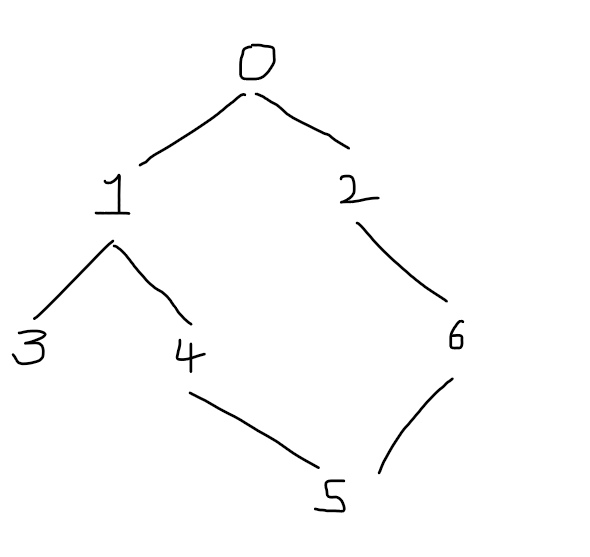

In [92]:
obj1 = Graph(7)
obj1.addEdge(0,1)
obj1.addEdge(0,2)

obj1.addEdge(1,3)
obj1.addEdge(1,4)
obj1.addEdge(4,5)

obj1.addEdge(2,6)
obj1.addEdge(6,5)

obj1.bfs()

0 1 2 3 4 6 5 

## DFS for disonnected-graph

In [7]:
class DFS_diconnected(Graph):    
    def __dfsHelper(self,sv,visited):  ## private class
        print(sv,end=' ')
        visited[sv] = True
        for i in range(self.nVertices):
            ## if there is an edge and that edge is not visited
            if (self.adjMatrix[sv][i]>0) and (visited[i] is False):
                self.__dfsHelper(i,visited)        
    
    def dfs(self):
        cnt = 0  ## to maintain the count of number of disconnected graph
        visited = [False for i in range(self.nVertices)]  ## maintaining a visited array (intially which is 0)
        for i in range(self.nVertices):
            if visited[i] is False:  ## if that vertex is not at all visited
                cnt+=1  
                print("\nGraph - {}".format(cnt))
                self.__dfsHelper(i,visited)
    
    def __str__(self):
        return str(self.adjMatrix)

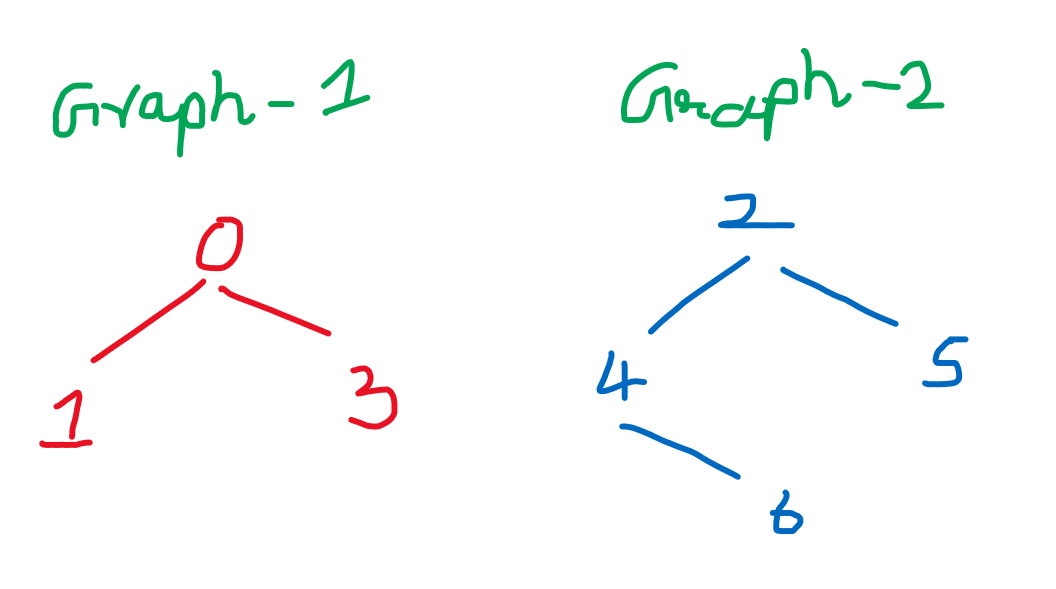

In [8]:
if __name__ == '__main__':
    obj1 = DFS_diconnected(7)
    obj1.addEdge(0,1)
    obj1.addEdge(0,3)

    obj1.addEdge(2,4)
    obj1.addEdge(2,5)
    obj1.addEdge(4,6)

    obj1.dfs()


Graph - 1
0 1 3 
Graph - 2
2 4 6 5 

## BFS for disonnected-graph

In [9]:
import queue
class BFS_disconnected(Graph):    
    def __bfsHelper(self,sv,visited):
        q = queue.Queue()
        
        q.put(sv)   # intially pushing 0 into the queue
        visited[sv] = True  # and 0 is visited
        
        while q.empty() is False:
            u = q.get() ## After Dequeue,start exploring all the vertices
            print(u,end=' ')
            
            for v in range(self.nVertices):  ## if a vertex is there and not yet visited
                if (self.adjMatrix[u][v]>0 and visited[v] is False):
                    q.put(v)
                    visited[v] = True
                    
    def bfs(self):
        cnt = 0  ## to maintain the count of number of disconnected graph
        visited = [False for i in range(self.nVertices)]  ## maintaining a visited array (intially which is 0)
        for i in range(self.nVertices):
            if visited[i] is False:  ## if that vertex is not at all visited
                cnt+=1  
                print("\nGraph - {}".format(cnt))
                self.__bfsHelper(i,visited)
            
    def __str__(self):
        return str(self.adjMatrix)

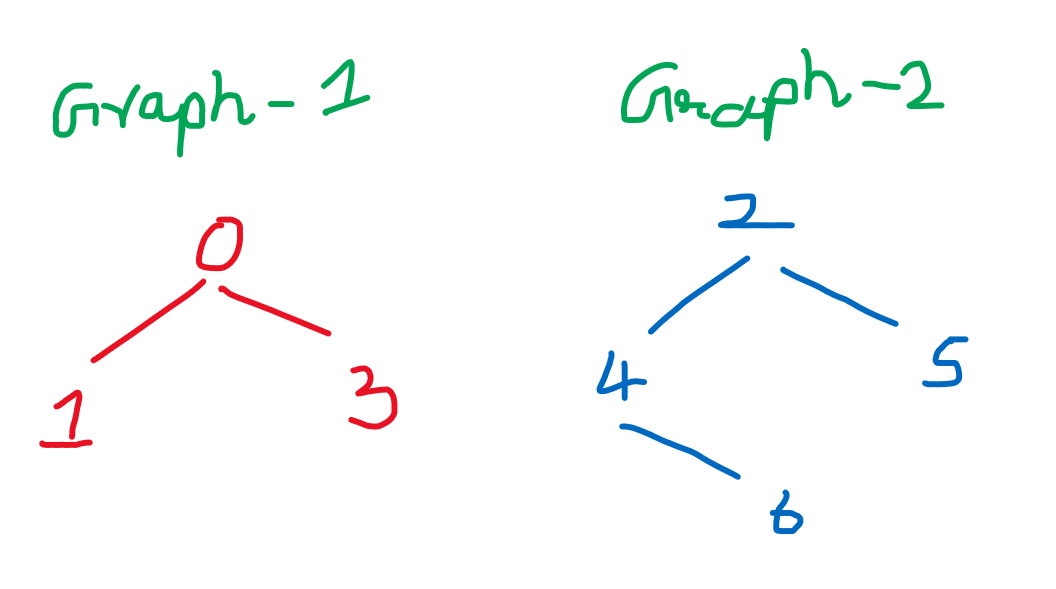

In [10]:
if __name__ == '__main__':
    obj1 = BFS_disconnected(7)
    obj1.addEdge(0,1)
    obj1.addEdge(0,3)

    obj1.addEdge(2,4)
    obj1.addEdge(2,5)
    obj1.addEdge(4,6)

    obj1.bfs()


Graph - 1
0 1 3 
Graph - 2
2 4 5 6 

## Path using Depth First Search

In [97]:
class DFS_Path(Graph): ## Inherting the graph class
    def __dfsHelper(self,vertex1,vertex2,visited,path_list):  ## private class
        visited[vertex1]   = True   ## make the current vertex as visited
        path_list.append(vertex1)   ## store the current vertex in the path
        
        if (vertex1==vertex2):  ## if current vertex is same as destination, then print the path
            print(path_list)    ## Want all the path from source to destination, so no return we should traverse the complete graph
        
        else:    ## if current vertex is not same as destination,do the dfs on that current vertex
        
            for i in range(self.nVertices):
                if (self.adjMatrix[vertex1][i]>0) and (visited[i] is False):
                    self.__dfsHelper(i,vertex2,visited,path_list)
        
        ## Remove the current vertex and make them as un-visited
        path_list.pop()
        visited[vertex1]= False
    
    def dfs(self,vertex1,vertex2):
        visited = [False for i in range(self.nVertices)]  ## maintaining a visited array (intially which is 0)
        path_list = []
        self.__dfsHelper(vertex1,vertex2,visited,path_list)
                
    def getpath(self,vertex1,vertex2):
        self.dfs(vertex1,vertex2)
        
    def __str__(self):
        return str(self.adjMatrix)

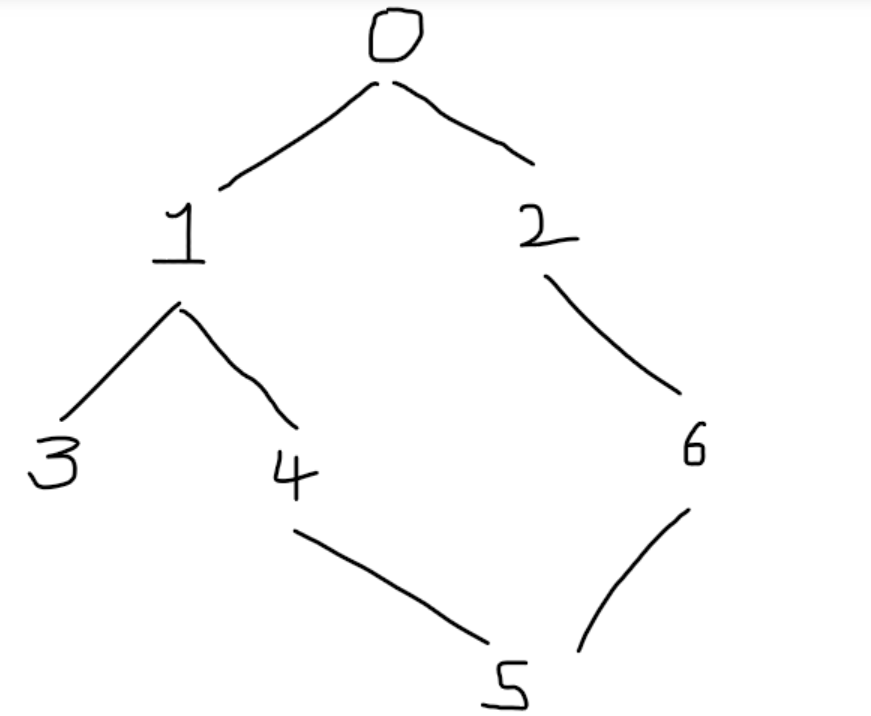

In [98]:
if __name__ == '__main__':
    obj1 = DFS_Path(7)
    obj1.addEdge(0,1)
    obj1.addEdge(0,2)

    obj1.addEdge(1,3)
    obj1.addEdge(1,4)
    obj1.addEdge(4,5)

    obj1.addEdge(2,6)
    obj1.addEdge(6,5)

    obj1.getpath(0,5)

[0, 1, 4, 5]
[0, 2, 6, 5]


## Path using Breadth First Search

In [108]:
def __bfsHelper(self,sv,visited):
        q = queue.Queue()
        path_dict1 = {}
        
        q.put(sv)   # intially pushing 0 into the queue
        visited[sv] = True  # and 0 is visited
        
        while q.empty() is False:
            u = q.get() ## After Dequeue,start exploring all the vertices
            front = u
            
            if (front==vertex2):
                print(path)
            
            else:
                for v in range(self.nVertices):  ## if a vertex is there and not yet visited
                    if (self.adjMatrix[u][v]>0 and visited[v] is False):
                        q.put(v)
                        visited[v] = True
                        
                        ## parent[v] must be front
                    
    def bfs(self):
        cnt = 0  ## to maintain the count of number of disconnected graph
        visited = [False for i in range(self.nVertices)]  ## maintaining a visited array (intially which is 0)
        for i in range(self.nVertices):
            if visited[i] is False:  ## if that vertex is not at all visited
                cnt+=1  
                print("\nGraph - {}".format(cnt))
                self.__bfsHelper(i,visited)
            

In [109]:
if __name__ == '__main__':
    obj1 = BFS_Path(7)
    obj1.addEdge(0,1)
    obj1.addEdge(0,2)

    obj1.addEdge(1,3)
    obj1.addEdge(1,4)
    obj1.addEdge(4,5)

    obj1.addEdge(2,6)
    obj1.addEdge(6,5)
    
    obj1.bfs(0,5)

[0, 1, 0, 0, 3]
